In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_hub as hub
import PIL
import cv2
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
with open('ImageNetLabels.txt','r') as f:
    lines = f.readlines()
    labels = [line.strip('\n') for line in lines]

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,),trainable=False)
])

In [ ]:
img_data = cv2.imread('./goldfish.jpg')
resized_image_data = cv2.resize(img_data, IMAGE_SHAPE)
resized_image_data = resized_image_data/255.0
new_data = resized_image_data[np.newaxis,:]

In [ ]:
pred = classifier.predict(new_data)

1/1 [==============================] - 1s 572ms/step


In [ ]:
result = np.argmax(pred)

In [ ]:
result

2

In [ ]:
labels[result]

'goldfish'

NOW CUSTOMIZING THE CLASSIFIER FOR OUR PROBLEM

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
import pathlib

paths = pathlib.Path(data_dir)

In [ ]:
flowers_data = {
    'daisy' : list(paths.glob('daisy/*')),
    'dandelion' : list(paths.glob('dandelion/*')),
    'roses' : list(paths.glob('roses/*')),
    'sunflowers' : list(paths.glob('sunflowers/*')),
    'tulips' : list(paths.glob('tulips/*'))
}

flowers_label = {
    'daisy' : 0,
    'dandelion' : 1,
    'roses' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [ ]:
X,y = [], []

INPUT_SHAPE = (224,224)
for flower_name, flower_list in flowers_data.items():
  for flower in flower_list:
    bgr_image_data = cv2.imread(str(flower))
    rgb_image_data = cv2.cvtColor(bgr_image_data, cv2.COLOR_BGR2RGB)
    resized_image_data = cv2.resize(rgb_image_data, INPUT_SHAPE)
    X.append(resized_image_data)
    y.append(flowers_label[flower_name])

In [ ]:
X,y = np.array(X), np.array(y)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0, test_size = 0.2, stratify = y)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_dense = hub.KerasLayer(
    feature_extractor_model, input_shape = INPUT_SHAPE + (3,), trainable=False
)

In [ ]:
model = keras.Sequential([
    pretrained_model_without_dense,
    keras.layers.Dense(5)
])

model.compile(
    optimizer = 'adam',
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

model.fit(X_train_scaled,y_train,epochs = 5)

Epoch 1/5
92/92 [==============================] - 19s 167ms/step - loss: 0.7499 - accuracy: 0.7343
Epoch 2/5
92/92 [==============================] - 15s 168ms/step - loss: 0.3507 - accuracy: 0.8900
Epoch 3/5
92/92 [==============================] - 15s 168ms/step - loss: 0.2746 - accuracy: 0.9087
Epoch 4/5
92/92 [==============================] - 16s 169ms/step - loss: 0.2215 - accuracy: 0.9329
Epoch 5/5
92/92 [==============================] - 16s 173ms/step - loss: 0.1911 - accuracy: 0.9441


In [ ]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 4s 169ms/step - loss: 0.3486 - accuracy: 0.8801


[0.34862571954727173, 0.8801090121269226]

In [ ]:
predictions = np.argmax(model.predict(new_data))

1/1 [==============================] - 0s 468ms/step


In [ ]:
labels[predictions]

'goldfish'

In [ ]:
def get_flower_label(f_labels, pred_label):
  for key,val in f_labels.items():
    if val == pred_label:
      return key

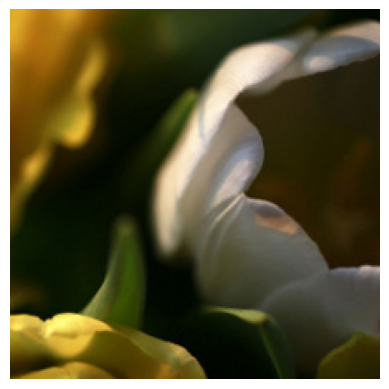

In [ ]:
import matplotlib.pyplot as plt

def plot_image(data):
  plt.axis('off')
  plt.imshow(data)

plot_image(X_test_scaled[0])


In [ ]:
new_predictions = model.predict(X_test_scaled)
def predict(predicted_y, index):
  flower_pred = np.argmax(predicted_y[index])
  return get_flower_label(flowers_label,flower_pred)

23/23 [==============================] - 4s 169ms/step


In [ ]:
predict(new_predictions,10)

'sunflowers'

In [ ]:
get_flower_label(flowers_label, y_test[10])

'sunflowers'

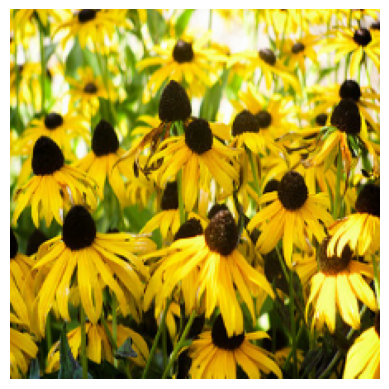

In [ ]:
plot_image(X_test_scaled[10])

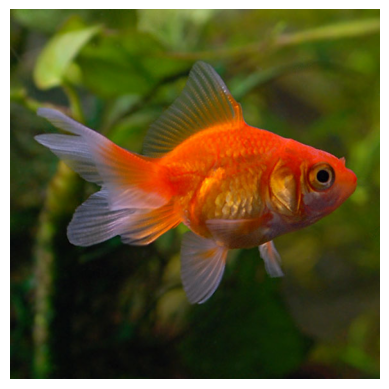

In [ ]:
image = cv2.imread('./goldfish.jpg')
original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plot_image(original_image)